In [9]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.sw.info

import rtmtools.rrtmg.sw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.sw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)


<module 'rtmtools.rrtmg.sw.analyse' from '/nuwa_cluster/home/jackyu/radiation/rtmtools/rtmtools/rrtmg/sw/analyse.py'>

# Shortwave. Mid-latitude summer. $H_{2}O$. 

In [2]:
name_molecule = r'$H_{2}O$'

In [3]:
# Load CRD results

# CRD H2008, z = 60 degrees
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/SW/examples/mls75_H2O/OUTPUT_CRD.dat'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)


In [4]:
# CRD H2012, z = 60 degrees
pathout_crd = '../crd/SW/examples/mls75_H2O_solzen_60_H2012/OUTPUT_CRD.dat'
pnl_crd_H2012 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)

In [10]:
# CRD H2012, z = 30 degrees
pathout_crd = '../crd/SW/examples/mls75_H2O_solzen_30_H2012/OUTPUT_CRD.dat'
pnl_crd_H2012_z30 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)

The following bands contain values that might not be valid floats. 

This might be the case if you compiled Fortran with -r8 and have not left enough spaces 

for very small numbers like 1.11111e-123 in the ASCII file, so it becomes 1.11111-123.
V1    V2  
1394  1396    object
1418  1420    object
1436  1438    object
1456  1458    object
1458  1460    object
1464  1466    object
1472  1474    object
1486  1488    object
1488  1490    object
1496  1498    object
1498  1500    object
1504  1506    object
1506  1508    object
1508  1510    object
1510  1512    object
1516  1518    object
1518  1520    object
1520  1522    object
1522  1524    object
1524  1526    object
1526  1528    object
1532  1534    object
1534  1536    object
1536  1538    object
1538  1540    object
1540  1542    object
1542  1544    object
1544  1546    object
1554  1556    object
1556  1558    object
               ...  
3732  3734    object
3734  3736    object
3736  3738    object
3740  3742    object
3742  37

In [12]:
# CRD H2012, z = 75 degrees
pathout_crd = '../crd/SW/examples/mls75_H2O_solzen_75_H2012/OUTPUT_CRD.dat'
pnl_crd_H2012_z75 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)

The following bands contain values that might not be valid floats. 

This might be the case if you compiled Fortran with -r8 and have not left enough spaces 

for very small numbers like 1.11111e-123 in the ASCII file, so it becomes 1.11111-123.
V1    V2  
1338  1340    object
1362  1364    object
1386  1388    object
1394  1396    object
1396  1398    object
1398  1400    object
1404  1406    object
1416  1418    object
1418  1420    object
1420  1422    object
1422  1424    object
1428  1430    object
1430  1432    object
1434  1436    object
1436  1438    object
1452  1454    object
1454  1456    object
1456  1458    object
1458  1460    object
1460  1462    object
1462  1464    object
1464  1466    object
1466  1468    object
1470  1472    object
1472  1474    object
1474  1476    object
1476  1478    object
1486  1488    object
1488  1490    object
1490  1492    object
               ...  
3872  3874    object
3874  3876    object
3880  3882    object
3882  3884    object
3884  38

## In selected spectral bands

In [5]:
# By arbitrary bands

def define_spectral_bands():
    return [(1000, 4400),
           (4400, 8200),
           (8200, 14280),
           (14280, 25000),
           (1000, 25000)]


def fluxtableNhrplot_by_bands(bands, *infos_lbl):
    global name_molecule, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
          
    pnls = [aeranalyse.lines2bands(pnl_lbl, wbands = bands)\
            for pnl_lbl in pnls_lbl]
    
    
    for item in bands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {} ~ {} cm-1'.format(*item))      
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['heating_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Heating rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = False,
                              xlim_linear = None,
                              xlim_log = None)
    
        display.display(plt.gcf()); plt.close()

Flux tables and heating rates in various spectral bands


---------------------------------------------------------------------------


Wavenumber band: 1000 ~ 4400 cm-1

CRD H2008 z60
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.352153  29.352153      0.351053
30   299.800000        0  25.503405  25.503405      0.355012
0   1013.000000        0  10.547747  10.547747      0.100244

CRD H2012 z60
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.352152  29.352152      0.352367
30   299.800000        0  25.499421  25.499421      0.355324
0   1013.000000        0  10.532794  10.532794      0.100384

CRD H2012 z30
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  50.837996  50.837996      0.353287
30   299.800000        0  45.533939  45.533939      0.518831
0   1013.000000        0  20.444083  20.444083      0.176896

CRD H2012 z75
       pressure  flux_up  flux_down   

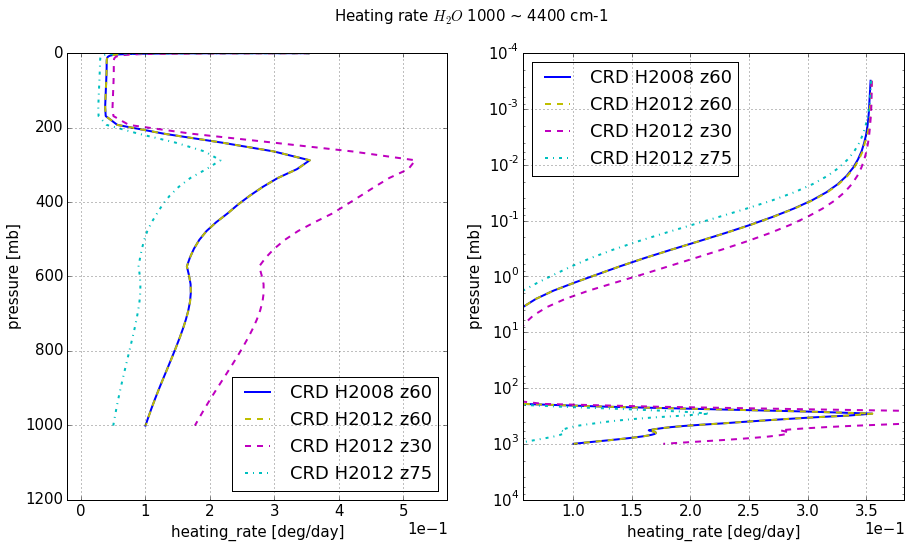

---------------------------------------------------------------------------


Wavenumber band: 4400 ~ 8200 cm-1

CRD H2008 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874482  113.874482      0.104813
30   299.800000        0  109.312006  109.312006      0.514142
0   1013.000000        0   65.972910   65.972910      0.315031

CRD H2012 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874481  113.874481      0.103635
30   299.800000        0  109.308523  109.308523      0.514424
0   1013.000000        0   65.936687   65.936687      0.317339

CRD H2012 z30
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  197.230605  197.230605      0.105592
30   299.800000        0  191.396120  191.396120      0.679051
0   1013.000000        0  121.224381  121.224381      0.544921

CRD H2012 z75
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00

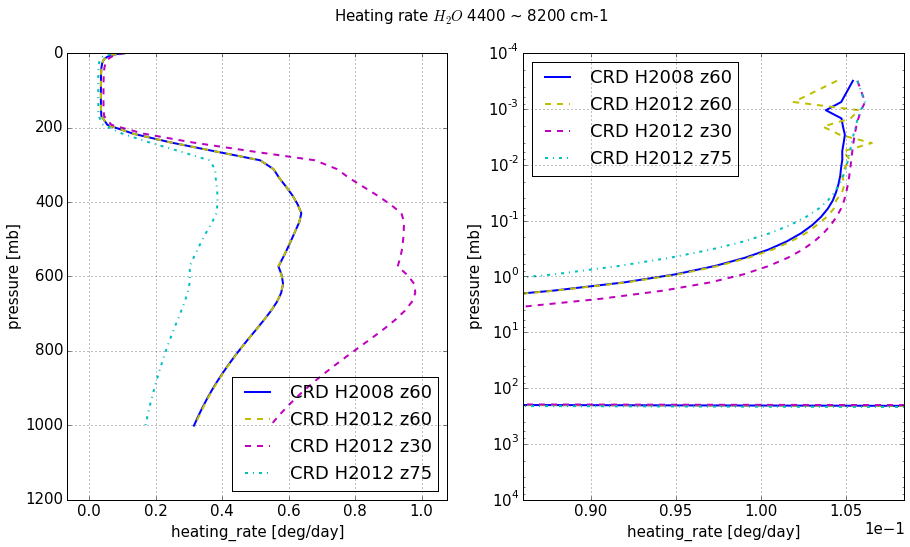

---------------------------------------------------------------------------


Wavenumber band: 8200 ~ 14280 cm-1

CRD H2008 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865503  220.865503      0.005160
30   299.800000        0  220.015104  220.015104      0.119130
0   1013.000000        0  176.023173  176.023173      0.735974

CRD H2012 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865516  220.865516      0.005619
30   299.800000        0  219.955098  219.955098      0.125926
0   1013.000000        0  175.592757  175.592757      0.728109

CRD H2012 z30
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  382.539045  382.539045      0.006912
30   299.800000        0  381.512306  381.512306      0.146590
0   1013.000000        0  320.317090  320.317090      1.102391

CRD H2012 z75
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0

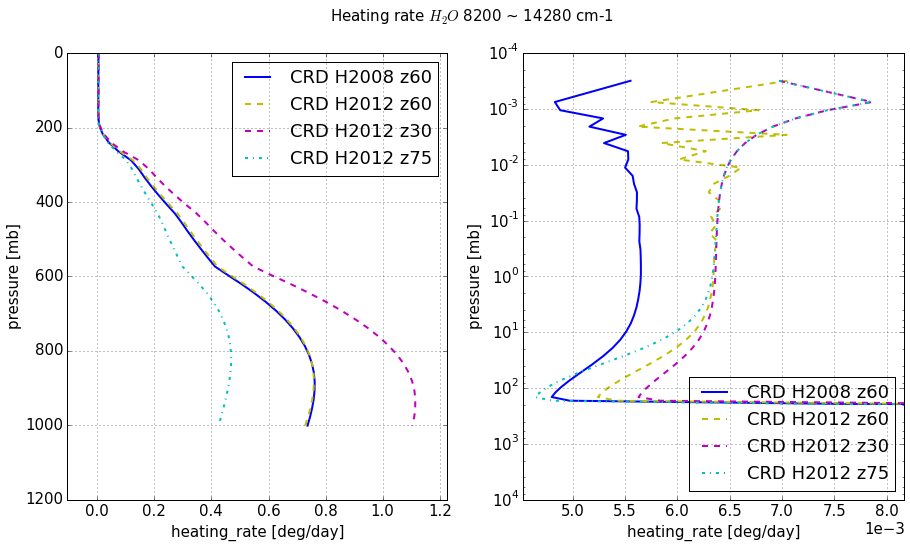

---------------------------------------------------------------------------


Wavenumber band: 14280 ~ 25000 cm-1

CRD H2008 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.238499  265.238499      0.000006
30   299.800000        0  265.230235  265.230235      0.001316
0   1013.000000        0  262.841654  262.841654      0.070991

CRD H2012 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.238503  265.238503      0.000000
30   299.800000        0  265.230089  265.230089      0.001341
0   1013.000000        0  262.775982  262.775982      0.073132

CRD H2012 z30
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  459.393082  459.393082      0.000685
30   299.800000        0  459.384649  459.384649      0.001343
0   1013.000000        0  456.733654  456.733654      0.081990

CRD H2012 z75
       pressure  flux_up   flux_down    net_flux  heating_rate
70     

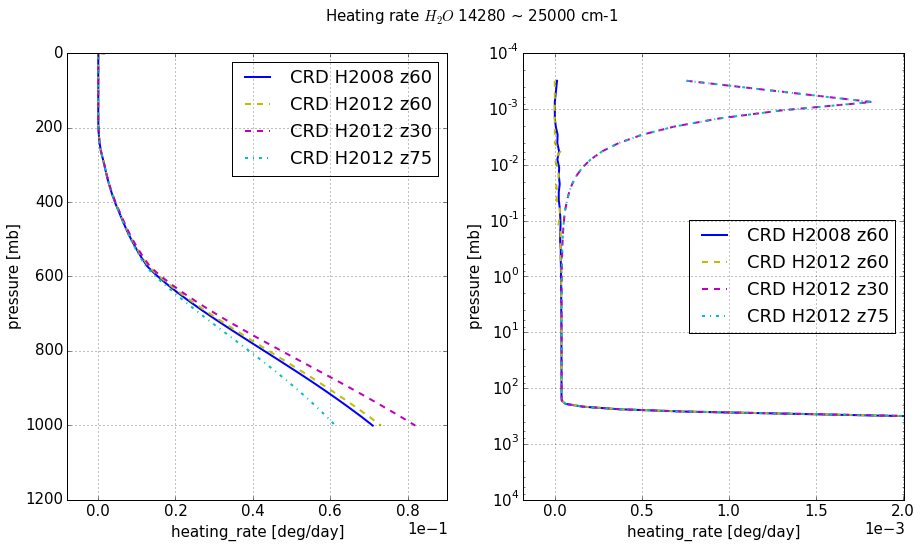

---------------------------------------------------------------------------


Wavenumber band: 1000 ~ 25000 cm-1

CRD H2008 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.330637  629.330637      0.461031
30   299.800000        0  620.060750  620.060750      0.989600
0   1013.000000        0  515.385483  515.385483      1.222241

CRD H2012 z60
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.330652  629.330652      0.461621
30   299.800000        0  619.993131  619.993131      0.997016
0   1013.000000        0  514.838220  514.838220      1.218964

CRD H2012 z30
       pressure  flux_up    flux_down     net_flux  heating_rate
70     0.002417        0  1090.000727  1090.000727      0.466475
30   299.800000        0  1077.827014  1077.827014      1.345815
0   1013.000000        0   918.719208   918.719208      1.906197

CRD H2012 z75
       pressure  flux_up   flux_down    net_flux  heating_rate


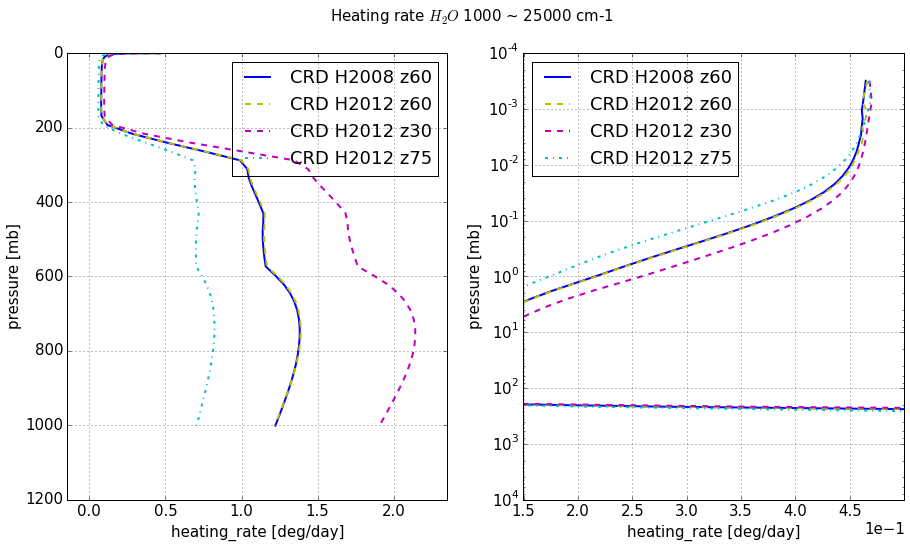

In [14]:
print('Flux tables and heating rates in various spectral bands')
print()
print()

fluxtableNhrplot_by_bands(define_spectral_bands(), \
                         ('CRD H2008 z60', 'b', '-', pnl_crd),
                         ('CRD H2012 z60', 'y', '--', pnl_crd_H2012),
                         ('CRD H2012 z30', 'm', '--', pnl_crd_H2012_z30),
                         ('CRD H2012 z75', 'c', '-.', pnl_crd_H2012_z75))

In [7]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')